# Principal Component Analysis (PCA)


PCA is a technique for reducing the dimension of a $n \times p$ data matrix $X$ by singling out the directions under which $X$ varies the most. The principal components $Z_i$ may be written as a sum $Z_i = \sum_{j=1}^p \phi_{ij} X_j \ $  where $p$ is the number of original predictor variables $X_j$. The coefficients  $\phi_{ij}$ are determined by maximizing the variance under the constraint $\sum_{j}\phi_{ij}^2 = 1$ for all $i$. The first principal component vector has a special geometric interpretation because it defines the line that is as close as possible to the data. In other words, the first principal component line minimizes the sum of the squared perpendicular distances between each point and the line. In this notebook we use scikit-learn to obtain a PCA decomposition of the input matrix for housing price data and construct a linear regression model using the PCs as input to predict the price.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('Data/DATA_Housing_Prices.csv') # load housing data

In [3]:
# Let's construct a dataframe with these features
data['Antiquity'] = data['YrSold'] - data['YearRemodAdd']

X = data.drop(columns=['Id','SalePrice','YearBuilt', 'YearRemodAdd', 'YrSold',
                       'LotFrontage','MasVnrArea','GarageYrBlt'], axis = 1)
y = np.log(data['SalePrice'])

data.describe() # inspect the data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Antiquity
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,22.950000
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,20.640653
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,-1.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,14.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,41.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,60.000000


In [4]:
X = X.select_dtypes(include=np.number)
X_cols = X.columns
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Antiquity
0,60,8450,7,5,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,2,5
1,20,9600,6,8,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,5,31
2,60,11250,7,5,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,9,6
3,70,9550,7,5,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,2,36
4,60,14260,8,5,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,12,8


In [5]:
X.isna().sum() # check for missing values

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
Antiquity        0
dtype: int64

# Scaling the data before PCA

In [6]:
# split the data into test/train sets for machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler() # transform to a new variable z=(x-mu)/sigma, which scales and shifts the data

scaler.fit(X_train) # get the parameters mu and sigma for each column (from the train set!)

X_train = scaler.transform(X_train) # transform
X_test  = scaler.transform(X_test) # transform

X_train = pd.DataFrame(X_train, columns = X.columns) # repack
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [7]:
X_train.shape

(1168, 31)

In [8]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Antiquity
0,-0.866764,-0.212896,-0.820445,0.372217,1.037269,-0.285504,-0.400282,0.572612,0.374235,-0.801923,...,-0.863837,1.188402,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.452679
1,0.074110,-0.265245,-0.088934,1.268609,-0.971996,-0.285504,0.511920,-0.596547,-0.958202,0.955088,...,-0.456264,-0.740157,-0.138015,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,-0.382563
2,-0.631546,-0.177841,-0.820445,1.268609,-0.971996,-0.285504,0.505196,-0.603357,-0.965964,-0.801923,...,-2.257169,1.790113,-0.714352,2.290826,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,1.694159
3,-0.161109,-0.324474,-0.820445,1.268609,0.267995,-0.285504,-0.915776,-0.750921,-0.487321,0.989227,...,-1.119755,-0.740157,-0.714352,3.902257,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.645863
4,-0.161109,-0.529035,-0.820445,0.372217,-0.496920,-0.285504,0.532091,-0.081209,-0.370895,0.711564,...,-0.797488,-0.740157,-0.714352,3.547742,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,1.790750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.866764,-0.127631,-0.088934,-0.524174,-0.919694,-0.285504,1.612389,0.572612,0.374235,-0.801923,...,-0.171910,-0.740157,-0.397367,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-1.257196,-1.058704
1164,-0.161109,-0.268313,-1.551955,-2.316957,0.383495,-0.285504,-0.158223,0.136732,0.410457,0.684253,...,0.472624,2.584680,-0.080381,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,2.114141,1.742454
1165,-0.866764,-0.234096,-0.820445,1.268609,-0.608062,-0.285504,0.283309,-0.448983,-0.790030,-0.801923,...,0.453667,-0.740157,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.882603,-0.334267
1166,-0.161109,-0.283376,0.642577,2.165000,-0.971996,-0.285504,0.765184,-0.340013,-0.665842,0.367900,...,-1.233497,-0.740157,2.743670,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,-0.672338


# Performing PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full') # singular value decomp

pca.fit(X_train) # fit to train

X_train = pca.transform(X_train) # transform
X_test  = pca.transform(X_test)  # transform

cols = ['PCA_' + str(i) for i in list(range(1,len(X.columns)+1))] # rename columns

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

In [24]:
# select the top 15 PCs
X_train = X_train.iloc[:,:15]
X_test = X_test.iloc[:,:15]
X_train

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,-1.831949,1.958218,0.786292,0.935775,0.546249,0.195964,0.451519,-0.143039,-0.775133,0.150858,-1.352208,-0.469618,-0.019202,-0.249586
1,0.014032,-2.090796,-0.368208,-0.928789,-1.076340,-0.192240,0.272721,0.135859,-0.080727,0.497065,0.064120,-0.256612,-0.123732,-0.239044
2,-4.517982,0.042709,-0.454717,1.332889,-0.889459,-0.312530,1.910311,-0.623448,-0.095808,0.526512,-1.158443,0.438451,0.307076,0.269543
3,-1.454531,-1.147408,2.907253,1.167000,-0.766471,-1.552878,1.271504,0.005446,-1.731429,0.716110,0.678641,2.467581,0.231160,-0.961774
4,-1.522270,-1.472269,-0.102242,2.078073,-0.099935,-1.309608,1.400255,-0.199706,-0.725767,0.343235,0.834798,1.741941,0.651113,-0.508660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.228474,0.324550,-2.596161,0.608154,-0.196145,-0.649210,0.357724,-0.071084,0.190081,0.356636,0.046859,-0.968069,0.220252,-0.070248
1164,1.474337,0.140566,1.139212,1.067441,1.184502,0.661741,-1.131747,-1.607441,-1.800929,-0.345319,-1.293105,0.127466,0.830569,0.157420
1165,-2.276094,1.411893,-0.871750,-0.730627,-0.197229,-0.257730,0.717455,0.235341,0.234732,0.477766,0.406216,-0.146704,-0.840736,-0.731845
1166,-0.429466,-1.629289,-0.313814,-0.641315,-2.316270,-0.374665,-0.088372,1.244949,0.349069,0.181397,-1.744196,0.544816,-0.383266,1.045425


# Getting variances

In [25]:
print(pca.explained_variance_ratio_) # Individual variances of each principal components
print(pca.singular_values_)

[1.94659261e-01 1.00316171e-01 6.69947183e-02 5.71372532e-02
 4.72736923e-02 3.84978620e-02 3.62225870e-02 3.44910781e-02
 3.40617359e-02 3.35036791e-02 3.20660391e-02 3.07060878e-02
 3.02706523e-02 2.93527314e-02 2.84953477e-02 2.79779428e-02
 2.63580721e-02 2.43060938e-02 2.13308972e-02 2.01356327e-02
 1.83437422e-02 1.47261290e-02 1.27574356e-02 9.47236245e-03
 8.64702588e-03 8.20070843e-03 6.22698369e-03 4.27617333e-03
 3.19190464e-03 3.83897702e-32 1.94165977e-33]
[8.39536927e+01 6.02681337e+01 4.92518503e+01 4.54843453e+01
 4.13725253e+01 3.73353798e+01 3.62152927e+01 3.53391137e+01
 3.51184757e+01 3.48296026e+01 3.40741418e+01 3.33437554e+01
 3.31064915e+01 3.26006702e+01 3.21210141e+01 3.18280592e+01
 3.08929292e+01 2.96660588e+01 2.77911699e+01 2.70013146e+01
 2.57718881e+01 2.30912035e+01 2.14923528e+01 1.85195923e+01
 1.76943921e+01 1.72316932e+01 1.50155461e+01 1.24431380e+01
 1.07504643e+01 3.72829290e-14 8.38472521e-15]


In [26]:
variances = pca.explained_variance_ratio_.tolist()
variances[:5]

[0.1946592607021985,
 0.10031617149771925,
 0.06699471826101641,
 0.057137253235893894,
 0.047273692279949604]

In [27]:
total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cumulative_variance': total_variance})
scree.head(10)

,num_pca,variance,cumulative_variance
0,1,0.194659,0.194659
1,2,0.100316,0.294975
2,3,0.066995,0.361970
3,4,0.057137,0.419107
4,5,0.047274,0.466381
5,6,0.038498,0.504879
6,7,0.036223,0.541102
7,8,0.034491,0.575593
8,9,0.034062,0.609654
9,10,0.033504,0.643158


<AxesSubplot:xlabel='num_pca', ylabel='cumulative_variance'>

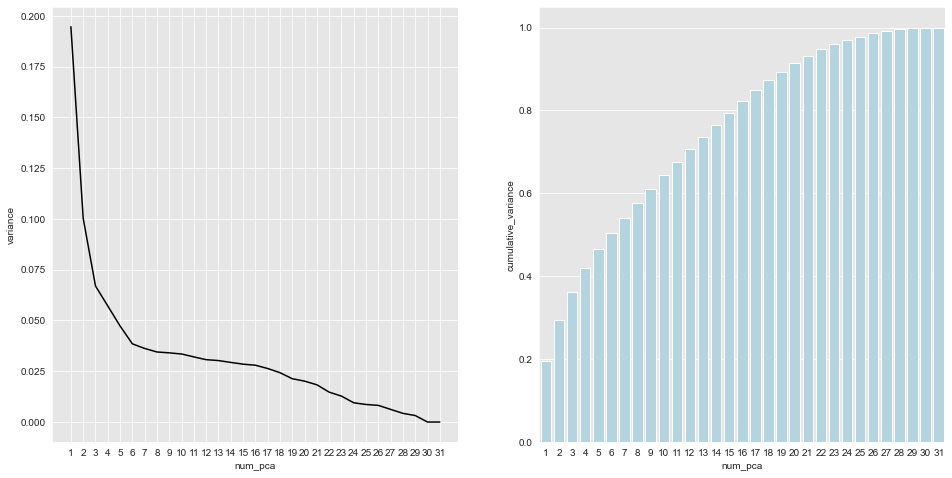

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cumulative_variance", data=scree, ax = ax[1], color = 'lightblue')

Here we have a very bad scenario. On the left plot it looks that there is an elbow at 6 pca's. However, with five principal components we are only able to explain only 51% of the total variability of the data!!! This can be seen from

```
cumulative_variance[6] = 0.51
```
Bear in mind that we only selected the numerical columns and we didn't take into account the categorical ones. 


# pca coefficients

In [29]:
pca.components_

array([[-9.14713738e-03,  1.28792378e-01,  3.14050332e-01,
        -6.29542263e-02,  1.31427582e-01, -2.64919876e-03,
         1.37500548e-01,  2.75237858e-01,  2.81649735e-01,
         1.73712608e-01,  8.00261205e-03,  3.54000077e-01,
         6.59566344e-02, -2.15633545e-02,  2.85001973e-01,
         1.38341449e-01,  1.50258245e-01,  7.17777997e-04,
         2.90969002e-01,  2.11476886e-01,  2.95399118e-01,
         2.92682652e-01,  1.49070934e-01,  1.64438398e-01,
        -6.45910546e-02,  1.44426458e-02,  4.92544571e-02,
         7.64019965e-02, -8.27103988e-03,  2.96048546e-02,
        -2.02472006e-01],
       [-2.25547911e-01,  1.08069604e-01,  3.23941945e-02,
        -3.48087395e-02,  3.50187356e-01,  1.08754165e-01,
        -1.08891288e-01,  2.93554348e-01,  2.56392526e-01,
        -4.21147781e-01, -9.29905976e-02, -1.72446725e-01,
         3.18995527e-01,  1.44416659e-02, -1.47839154e-01,
        -2.28361740e-01, -3.09026545e-01, -1.77943765e-01,
        -2.65695840e-01,  5.84

In [30]:
# First pca components. The first principal component direction of the data is that along which the observations vary the most.
pca.components_[0,:]

array([-0.00914714,  0.12879238,  0.31405033, -0.06295423,  0.13142758,
       -0.0026492 ,  0.13750055,  0.27523786,  0.28164973,  0.17371261,
        0.00800261,  0.35400008,  0.06595663, -0.02156335,  0.28500197,
        0.13834145,  0.15025824,  0.00071778,  0.290969  ,  0.21147689,
        0.29539912,  0.29268265,  0.14907093,  0.1644384 , -0.06459105,
        0.01444265,  0.04925446,  0.076402  , -0.00827104,  0.02960485,
       -0.20247201])

In [31]:
# decomposition of the PCAs in terms of the original variables
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(12, 'GrLivArea', 0.35), (3, 'OverallQual', 0.31), (21, 'GarageCars', 0.3), (22, 'GarageArea', 0.29), (19, 'TotRmsAbvGrd', 0.29), (15, 'FullBath', 0.29), (9, '1stFlrSF', 0.28), (8, 'TotalBsmtSF', 0.28), (20, 'Fireplaces', 0.21), (31, 'Antiquity', -0.2), (10, '2ndFlrSF', 0.17), (24, 'OpenPorchSF', 0.16), (17, 'BedroomAbvGr', 0.15), (23, 'WoodDeckSF', 0.15), (16, 'HalfBath', 0.14), (7, 'BsmtUnfSF', 0.14), (5, 'BsmtFinSF1', 0.13), (2, 'LotArea', 0.13), (28, 'PoolArea', 0.08), (13, 'BsmtFullBath', 0.07), (25, 'EnclosedPorch', -0.06), (4, 'OverallCond', -0.06), (27, 'ScreenPorch', 0.05), (30, 'MoSold', 0.03), (14, 'BsmtHalfBath', -0.02), (26, '3SsnPorch', 0.01), (1, 'MSSubClass', -0.01), (29, 'MiscVal', -0.01), (11, 'LowQualFinSF', 0.01), (6, 'BsmtFinSF2', -0.0), (18, 'KitchenAbvGr', 0.0)]

Principal component  2
[(10, '2ndFlrSF', -0.42), (5, 'BsmtFinSF1', 0.35), (13, 'BsmtFullBath', 0.32), (17, 'BedroomAbvGr', -0.31), (8, 'TotalBsmtSF', 0.29), (19, 'TotRmsAbvGrd', -

=# Generating a regression model with the pca

In [32]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def show_errors(y_real_train, y_pred_train, y_real_test, y_pred_test):
    """ plots the errors of a linear regression model
    :param y_real_train: target variable (price) for the train set
    :param y_pred_train: predicted price  from model on the train set
    :param y_real_test: target variable (price) for the test set
    :param y_pred_test: predicted price from model on the test set
    :return: array of plots comparing y_true and y_predict for test and train and distribution of residuals in both cases
    """

    plt.style.use('seaborn') 

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    
    ax[0,0].scatter(x = np.exp(y_real_train), y = np.exp(y_pred_train), c = 'green')
    ax[0,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[0,0].set_xlim(0,700000)
    ax[0,0].set_ylim(0,700000)

    ax[0,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].set_title('Train set')

    ax[0,1].hist(x = np.exp(y_real_train)-np.exp(y_pred_train), bins = 50,color = 'green')
    ax[0,1].set_xlim(-200000,200000)
    ax[0,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,1].set_title('Train set')

    ax[1,0].scatter(x = np.exp(y_real_test), y = np.exp(y_pred_test), c = 'blue')
    ax[1,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[1,0].set_xlim(0,700000)
    ax[1,0].set_ylim(0,700000)
    ax[1,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].set_title('Test set')   

    ax[1,1].hist(x = np.exp(y_real_test)-np.exp(y_pred_test), bins = 50,color = 'blue')
    ax[1,1].set_xlim(-200000,200000)
    ax[1,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,1].set_title('Test set')

    fig.tight_layout()
    pass

In [33]:
X_test

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,-1.994803,0.852331,0.157631,0.377846,-1.936344,2.646156,1.979813,0.140157,1.190953,-0.614779,-0.054969,-1.605626,1.054052,-1.342955
1,4.053934,-0.115026,1.684325,-0.722669,0.310230,-0.725246,0.375084,-0.286498,-0.934804,0.477195,-0.041466,-0.544187,0.282501,-0.598642
2,-2.513804,0.441165,-1.319379,1.337199,-0.560496,-1.518724,0.768797,-0.483007,-0.433027,0.565472,1.109900,0.275727,0.466456,-0.721664
3,0.018453,-0.990159,0.103043,0.834478,-0.791020,0.391182,-0.479539,0.312698,-0.724930,0.165334,-0.083986,1.279498,0.402614,-1.037153
4,2.924678,3.142746,-1.039438,-0.990387,0.690006,0.567701,0.327128,-0.220867,-0.040657,0.060627,0.231264,0.778770,-0.069778,-0.994580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-1.501164,0.547694,-1.492376,-0.236006,-0.513690,-0.248745,0.680904,0.380339,0.594169,0.338664,0.408556,-0.409621,-0.657625,-0.494741
288,1.540771,2.350692,0.469529,0.111099,0.813625,0.306985,0.374567,0.181415,-0.455325,0.149033,-0.893569,-0.191636,-0.004770,-0.273332
289,0.464400,-0.722223,1.208313,-2.020407,0.275159,0.327146,-0.484308,0.131886,-0.790308,-0.081497,-0.262686,0.868537,0.007667,-0.026904
290,-1.772677,-1.393147,0.921967,1.108103,0.364458,0.214706,-0.781270,-0.578685,-1.399781,-0.051182,-1.089668,0.143656,0.140395,0.041871


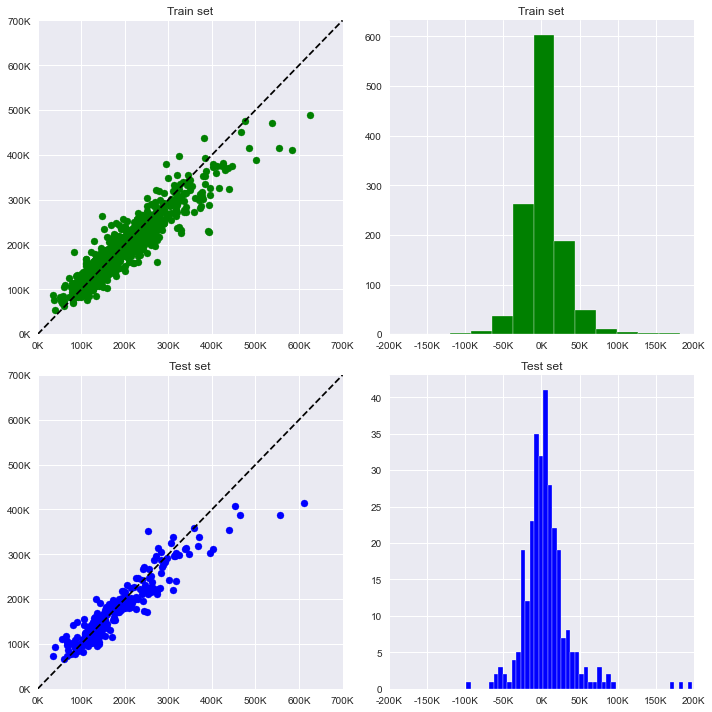

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred_train = lm.predict(X_train)
y_pred_test  = lm.predict(X_test)

show_errors(y_train, y_pred_train, y_test, y_pred_test)

Error metrics

In [37]:
lm.score(X_test,y_test), r2_score(y_test,y_pred_test)

(0.8461360579118911, 0.8461360579118911)

In [38]:
lm.score(X_train,y_train), r2_score(y_train,y_pred_train)

(0.8273433775673894, 0.8273433775673894)